# XD Strategy: Maximizing Dividend Profits with Smart Timing

Welcome to this notebook on the **XD Strategy**—a systematic approach for investors aiming to maximize returns from dividend-paying stocks.

## What is the XD Strategy?

The XD Strategy focuses on:
- **Selecting stocks** with high dividend yields.
- **Buying** these stocks **one month before or two months** their XD (ex-dividend) date.
- **Selling** the stocks **about one week before** the XD date to capture price appreciation as investors anticipate the upcoming dividend.
- **Close Positioning** when we get 5% profit or close position before xd date 1 week

By following this approach, we aim to benefit from both the expected dividend and the price movement leading up to the XD date, while minimizing the risk of price drops after the dividend is paid.

Let's explore how to implement this strategy step by step!

In [93]:
!pip install ezyquant

Defaulting to user installation because normal site-packages is not writeable


In [94]:
# import
import ezyquant as ez
from ezyquant.backtesting.account import SETAccount
from ezyquant.backtesting import Context

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# connect to database
database_path = "C:\\Users\\siraw\\Downloads\\ezyquant\\ezyquant.db"
ez.connect_sqlite(database_path)

In [97]:
# data reader 
ssc = ez.SETSignalCreator(
   start_date="2015-01-01", # วันที่ต้องการเริ่มดึง data
   end_date="2025-06-01", # วันที่สิ้นสุดการดึง data
   index_list=['SET'], # list index ที่ต้องการจะดึงข้อมูล ถ้าไม่ต้องการให้ใส่ list ว่าง
   symbol_list= ['TISCO'] # list หุ้นที่ต้องการจะดึง ถ้าไม่ต้องการให้ใส่ list ว่าง
)

In [98]:
df = ssc.get_data(
    field="dividend", timeframe="daily"
)

In [99]:
df

,2S,3BBIF,3K-BAT,A,A5,AAI,AAV,ABPIF,ACC,ACE,...,WPH,WR,WSOL,XBIO,XPG,XYZ,YCI,YNP,ZAA,ZEN
2015-01-05,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-06,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-07,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-08,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-09,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00
2025-05-27,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00
2025-05-28,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00
2025-05-29,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00


In [100]:
stocks = ['TISCO','EGCO','KKP','KGI','KYE','PSL','DCC','DIF','BAREIT','CPNREIT']

In [101]:
selected = [s for s in df.columns if s in stocks]
selected_df = df[selected]
selected_df

,BAREIT,CPNREIT,DCC,DIF,EGCO,KGI,KKP,KYE,PSL,TISCO
2015-01-05,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-06,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-07,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-08,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-09,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00
2025-05-27,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00
2025-05-28,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00
2025-05-29,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00


In [102]:
df_unique_dates = selected_df.copy()
for col in df_unique_dates.columns:
    df_unique_dates.loc[df_unique_dates[col].duplicated(), col] = np.nan
df_unique_dates

,BAREIT,CPNREIT,DCC,DIF,EGCO,KGI,KKP,KYE,PSL,TISCO
2015-01-05,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For testing, I will choose 'TISCO'

In [103]:
close_df = ssc.get_data(
    field="close", timeframe="daily"
)

In [104]:
selected_close_df = close_df[selected]
selected_close_df

,BAREIT,CPNREIT,DCC,DIF,EGCO,KGI,KKP,KYE,PSL,TISCO
2015-01-05,NaN,NaN,3.578125,10.70,163.0,3.50,38.50,260.0,10.3904,43.25
2015-01-06,NaN,NaN,3.562500,10.70,160.5,3.50,39.50,260.0,10.2376,43.50
2015-01-07,NaN,NaN,3.531250,10.70,163.0,3.58,39.00,262.0,10.2376,44.00
2015-01-08,NaN,NaN,3.562500,10.60,168.5,3.68,39.50,261.0,10.4668,45.25
2015-01-09,NaN,NaN,3.593750,10.70,164.0,3.72,39.75,262.0,11.1544,45.50
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,9.30,12.1,1.550000,8.05,109.0,3.80,47.00,315.0,6.4000,98.00
2025-05-27,9.30,12.1,1.520000,8.05,107.5,3.72,46.25,316.0,6.3500,97.75
2025-05-28,9.30,11.9,1.500000,8.10,107.5,3.80,46.00,320.0,6.2500,98.00
2025-05-29,9.30,12.0,1.500000,8.15,107.5,3.84,46.25,323.0,6.4500,97.75


In [105]:
closed_tisco = selected_close_df['TISCO']
closed_tisco

2015-01-05    43.25
2015-01-06    43.50
2015-01-07    44.00
2015-01-08    45.25
2015-01-09    45.50
              ...  
2025-05-26    98.00
2025-05-27    97.75
2025-05-28    98.00
2025-05-29    97.75
2025-05-30    97.50
Name: TISCO, Length: 2532, dtype: float64

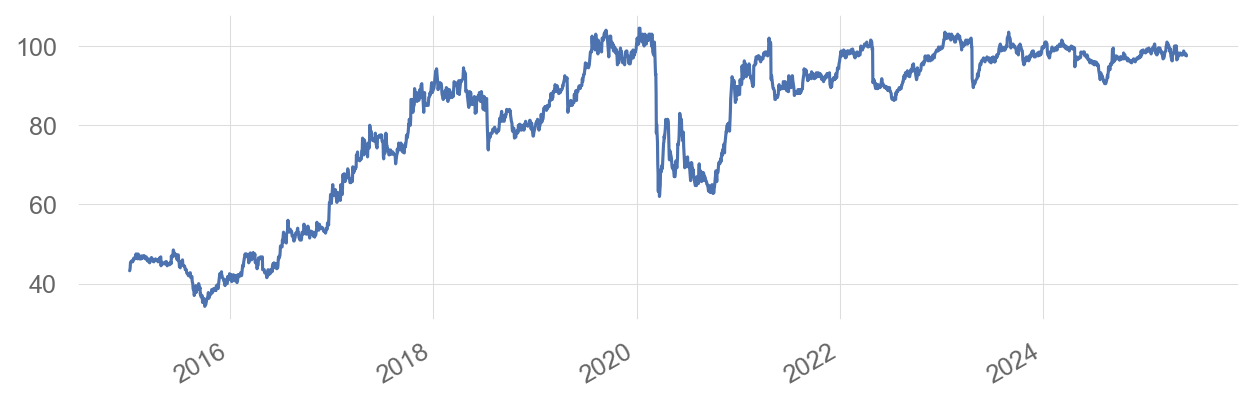

In [106]:
# plot tisco graph
plt.figure(figsize=(10,3),dpi=150)
selected_close_df['TISCO'].plot(label='Adj Close')
plt.show()

we will get unique xd date of 'TISCO'

In [107]:
xd_tisco = df_unique_dates['TISCO'].dropna()
xd_tisco

2015-01-05    2013-12-31 00:00:00
2015-02-18    2014-12-31 00:00:00
2016-02-24    2015-12-31 00:00:00
2017-02-20    2016-12-31 00:00:00
2018-02-28    2017-12-31 00:00:00
2019-02-28    2018-12-31 00:00:00
2020-02-27    2019-12-31 00:00:00
2021-03-01    2020-12-31 00:00:00
2022-03-02    2021-12-31 00:00:00
2023-02-23    2022-12-31 00:00:00
2023-08-28    2023-06-30 00:00:00
2024-02-28    2023-12-31 00:00:00
2024-08-29    2024-06-30 00:00:00
2025-02-26    2024-12-31 00:00:00
Name: TISCO, dtype: object

In [108]:
from pandas.tseries.offsets import DateOffset

In [109]:
# this is dataframe signal when we buy tisco before xd date 1 month
xd_tisco = pd.to_datetime(xd_tisco)

# ลบ 1 เดือน
xd_tisco_minus_1m = xd_tisco - pd.DateOffset(months=1)
xd_tisco_minus_1m

2015-01-05   2013-11-30
2015-02-18   2014-11-30
2016-02-24   2015-11-30
2017-02-20   2016-11-30
2018-02-28   2017-11-30
2019-02-28   2018-11-30
2020-02-27   2019-11-30
2021-03-01   2020-11-30
2022-03-02   2021-11-30
2023-02-23   2022-11-30
2023-08-28   2023-05-30
2024-02-28   2023-11-30
2024-08-29   2024-05-30
2025-02-26   2024-11-30
Name: TISCO, dtype: datetime64[ns]

In [110]:
# this is dataframe signal when we buy tisco before xd date 1 week for sell

xd_tisco_minus_1w = xd_tisco - pd.DateOffset(weeks=1)
xd_tisco_minus_1w

2015-01-05   2013-12-24
2015-02-18   2014-12-24
2016-02-24   2015-12-24
2017-02-20   2016-12-24
2018-02-28   2017-12-24
2019-02-28   2018-12-24
2020-02-27   2019-12-24
2021-03-01   2020-12-24
2022-03-02   2021-12-24
2023-02-23   2022-12-24
2023-08-28   2023-06-23
2024-02-28   2023-12-24
2024-08-29   2024-06-23
2025-02-26   2024-12-24
Name: TISCO, dtype: datetime64[ns]

Then create signal dataframe for backtesting
- For Buy position, we will buy TISCO 1 month or 2 month before xd date

In [111]:
signal_df1 = pd.DataFrame(False, index=selected_close_df.index, columns=['TISCO'])
signal_df1

,TISCO
2015-01-05,False
2015-01-06,False
2015-01-07,False
2015-01-08,False
2015-01-09,False
...,...
2025-05-26,False
2025-05-27,False
2025-05-28,False
2025-05-29,False


In [112]:
sell_df = pd.DataFrame(False, index=selected_close_df.index, columns=['TISCO'])
sell_df

,TISCO
2015-01-05,False
2015-01-06,False
2015-01-07,False
2015-01-08,False
2015-01-09,False
...,...
2025-05-26,False
2025-05-27,False
2025-05-28,False
2025-05-29,False


In [113]:
# สมมติว่า xd_tisco_minus_1m คือ Series ที่ค่าคือวันย้อนหลัง 1 เดือน
target_dates = set(xd_tisco_minus_1m.values)  # เอาเฉพาะค่าด้านหลัง
target_dates2 = set(xd_tisco_minus_1w.values)

# ตรวจสอบว่า signal_df.index เป็น datetime แล้ว
signal_df1.index = pd.to_datetime(signal_df1.index)
sell_df.index = pd.to_datetime(sell_df.index)

# สร้างคอลัมน์ใหม่ และ mark True เฉพาะวันที่ตรงกับใน target_dates
signal_df1['TISCO'] = signal_df1.index.isin(target_dates)
sell_df['TISCO'] = sell_df.index.isin(target_dates2)
##signal_df1[signal_df1['TISCO'] == True]

signal_df1


,TISCO
2015-01-05,False
2015-01-06,False
2015-01-07,False
2015-01-08,False
2015-01-09,False
...,...
2025-05-26,False
2025-05-27,False
2025-05-28,False
2025-05-29,False


In [126]:
sell_df = sell_df.T
sell_df

,TISCO
2015-01-05,False
2015-01-06,False
2015-01-07,False
2015-01-08,False
2015-01-09,False
...,...
2025-05-26,False
2025-05-27,False
2025-05-28,False
2025-05-29,False


Next, create Backtesting Algor

In [142]:
profit_pct = 0.00
port_value_list = []

def backtest_algorithm(c: Context):
    global profit_pct

    if c.volume > 0:
        profit_pct = (c.close_price / c.cost_price - 1) * 100
        print(c.symbol,c.volume,round(profit_pct, 2),"%",)

    port_value_list.append((c.ts, c.port_value))

    if c.signal:
        return c.buy_pct_port(1.0)        
    elif (sell_df.loc[c.ts, c.symbol]) | (profit_pct >= 5):                 
        return c.sell_pct_position(1.0) 
    else:
        return 0

In [143]:
start_date = "2015-01-01"
end_date = "2025-06-01"

In [144]:
# Run Backtest
result = ez.backtest(
    signal_df=signal_df1,   
    backtest_algorithm=backtest_algorithm,
    start_date=start_date,
    end_date=end_date,
    initial_cash=1e6,
    pct_commission=0.25,
    pct_buy_slip=0.0,
    pct_sell_slip=0.0,
    price_match_mode="weighted",
    signal_delay_bar=1,
)

TISCO 23100.0 0.29 %
TISCO 23100.0 0.87 %
TISCO 23100.0 2.03 %
TISCO 23100.0 4.93 %
TISCO 23100.0 5.51 %
TISCO 24400.0 0.44 %
TISCO 24400.0 -1.9 %
TISCO 24400.0 -1.9 %
TISCO 24400.0 -3.07 %
TISCO 24400.0 -3.65 %
TISCO 24400.0 -4.82 %
TISCO 24400.0 -5.4 %
TISCO 24400.0 -7.74 %
TISCO 24400.0 -4.82 %
TISCO 24400.0 -5.4 %
TISCO 24400.0 -4.23 %
TISCO 24400.0 -5.99 %
TISCO 24400.0 -6.57 %
TISCO 24400.0 -6.57 %
TISCO 24400.0 -2.48 %
TISCO 18700.0 -0.35 %
TISCO 18700.0 -0.81 %
TISCO 18700.0 -0.81 %
TISCO 18700.0 -1.28 %
TISCO 18700.0 -0.81 %
TISCO 18700.0 -1.75 %
TISCO 18700.0 0.58 %
TISCO 18700.0 0.12 %
TISCO 18700.0 0.12 %
TISCO 18700.0 2.91 %
TISCO 18700.0 3.38 %
TISCO 18700.0 1.98 %
TISCO 18700.0 5.7 %
TISCO 12300.0 -0.8 %
TISCO 12300.0 -1.08 %
TISCO 12300.0 -1.66 %
TISCO 12300.0 -1.66 %
TISCO 12300.0 -1.66 %
TISCO 12300.0 -1.66 %
TISCO 12300.0 -1.66 %
TISCO 12300.0 -0.8 %
TISCO 12300.0 0.65 %
TISCO 12300.0 0.94 %
TISCO 12300.0 1.81 %
TISCO 12300.0 2.1 %
TISCO 12300.0 1.52 %
TISCO 12300.0 

### Plot return compare with Benchmark(SET Index)

In [133]:
# Download set index data
import yfinance as yf 

In [137]:
set_index = yf.download('^SET.BK', start = start_date,end = end_date)
set_index.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK
Date,,,,,
2015-01-05,1483.250000,1502.099976,1482.869995,1499.699951,7129200
2015-01-06,1477.579956,1478.349976,1459.219971,1467.969971,31337800
2015-01-07,1500.750000,1500.829956,1478.260010,1478.839966,12400600
2015-01-08,1521.619995,1523.319946,1514.180054,1514.900024,18000300
2015-01-09,1529.420044,1531.209961,1522.750000,1529.500000,32278600


In [138]:
set_index = set_index.reset_index()

In [139]:
set_index['%_Change'] = set_index['Close'].pct_change(1)
set_index

Price,Date,Close,High,Low,Open,Volume,%_Change
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,
0,2015-01-05,1483.250000,1502.099976,1482.869995,1499.699951,7129200,NaN
1,2015-01-06,1477.579956,1478.349976,1459.219971,1467.969971,31337800,-0.003823
2,2015-01-07,1500.750000,1500.829956,1478.260010,1478.839966,12400600,0.015681
3,2015-01-08,1521.619995,1523.319946,1514.180054,1514.900024,18000300,0.013906
4,2015-01-09,1529.420044,1531.209961,1522.750000,1529.500000,32278600,0.005126
...,...,...,...,...,...,...,...
2519,2025-05-26,1178.430054,1180.030029,1168.170044,1178.719971,2797100,0.001760
2520,2025-05-27,1163.420044,1176.339966,1159.609985,1176.339966,3162700,-0.012737
2521,2025-05-28,1160.739990,1173.680054,1160.589966,1167.979980,3297900,-0.002304


In [140]:
set_index['%_Change'] = set_index['%_Change'] + 1

In [141]:
set_index['Money'] = set_index['%_Change'].cumprod()
set_index['Money'] = set_index['Money']*1000000
set_index = set_index.dropna()
set_index.head()

Price,Date,Close,High,Low,Open,Volume,%_Change,Money
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,,
1,2015-01-06,1477.579956,1478.349976,1459.219971,1467.969971,31337800,0.996177,9.961773e+05
2,2015-01-07,1500.750000,1500.829956,1478.260010,1478.839966,12400600,1.015681,1.011798e+06
3,2015-01-08,1521.619995,1523.319946,1514.180054,1514.900024,18000300,1.013906,1.025869e+06
4,2015-01-09,1529.420044,1531.209961,1522.750000,1529.500000,32278600,1.005126,1.031128e+06
5,2015-01-12,1531.209961,1538.930054,1522.170044,1527.420044,11352100,1.001170,1.032334e+06


In [145]:
df_port_value = pd.DataFrame(port_value_list, columns=['Timestamp_with_Time', 'Value'])

df_port_value['Date'] = df_port_value['Timestamp_with_Time'].dt.date
df_port_value['Date'] = pd.to_datetime(df_port_value['Date'])
processed_port_value = df_port_value.groupby('Date')['Value'].last().reset_index()
processed_port_value

,Date,Value
0,2015-01-05,1.000000e+06
1,2015-01-06,1.000397e+06
2,2015-01-07,1.006172e+06
3,2015-01-08,1.017722e+06
4,2015-01-09,1.046597e+06
...,...,...
2527,2025-05-26,1.378868e+06
2528,2025-05-27,1.378868e+06
2529,2025-05-28,1.378868e+06
2530,2025-05-29,1.378868e+06


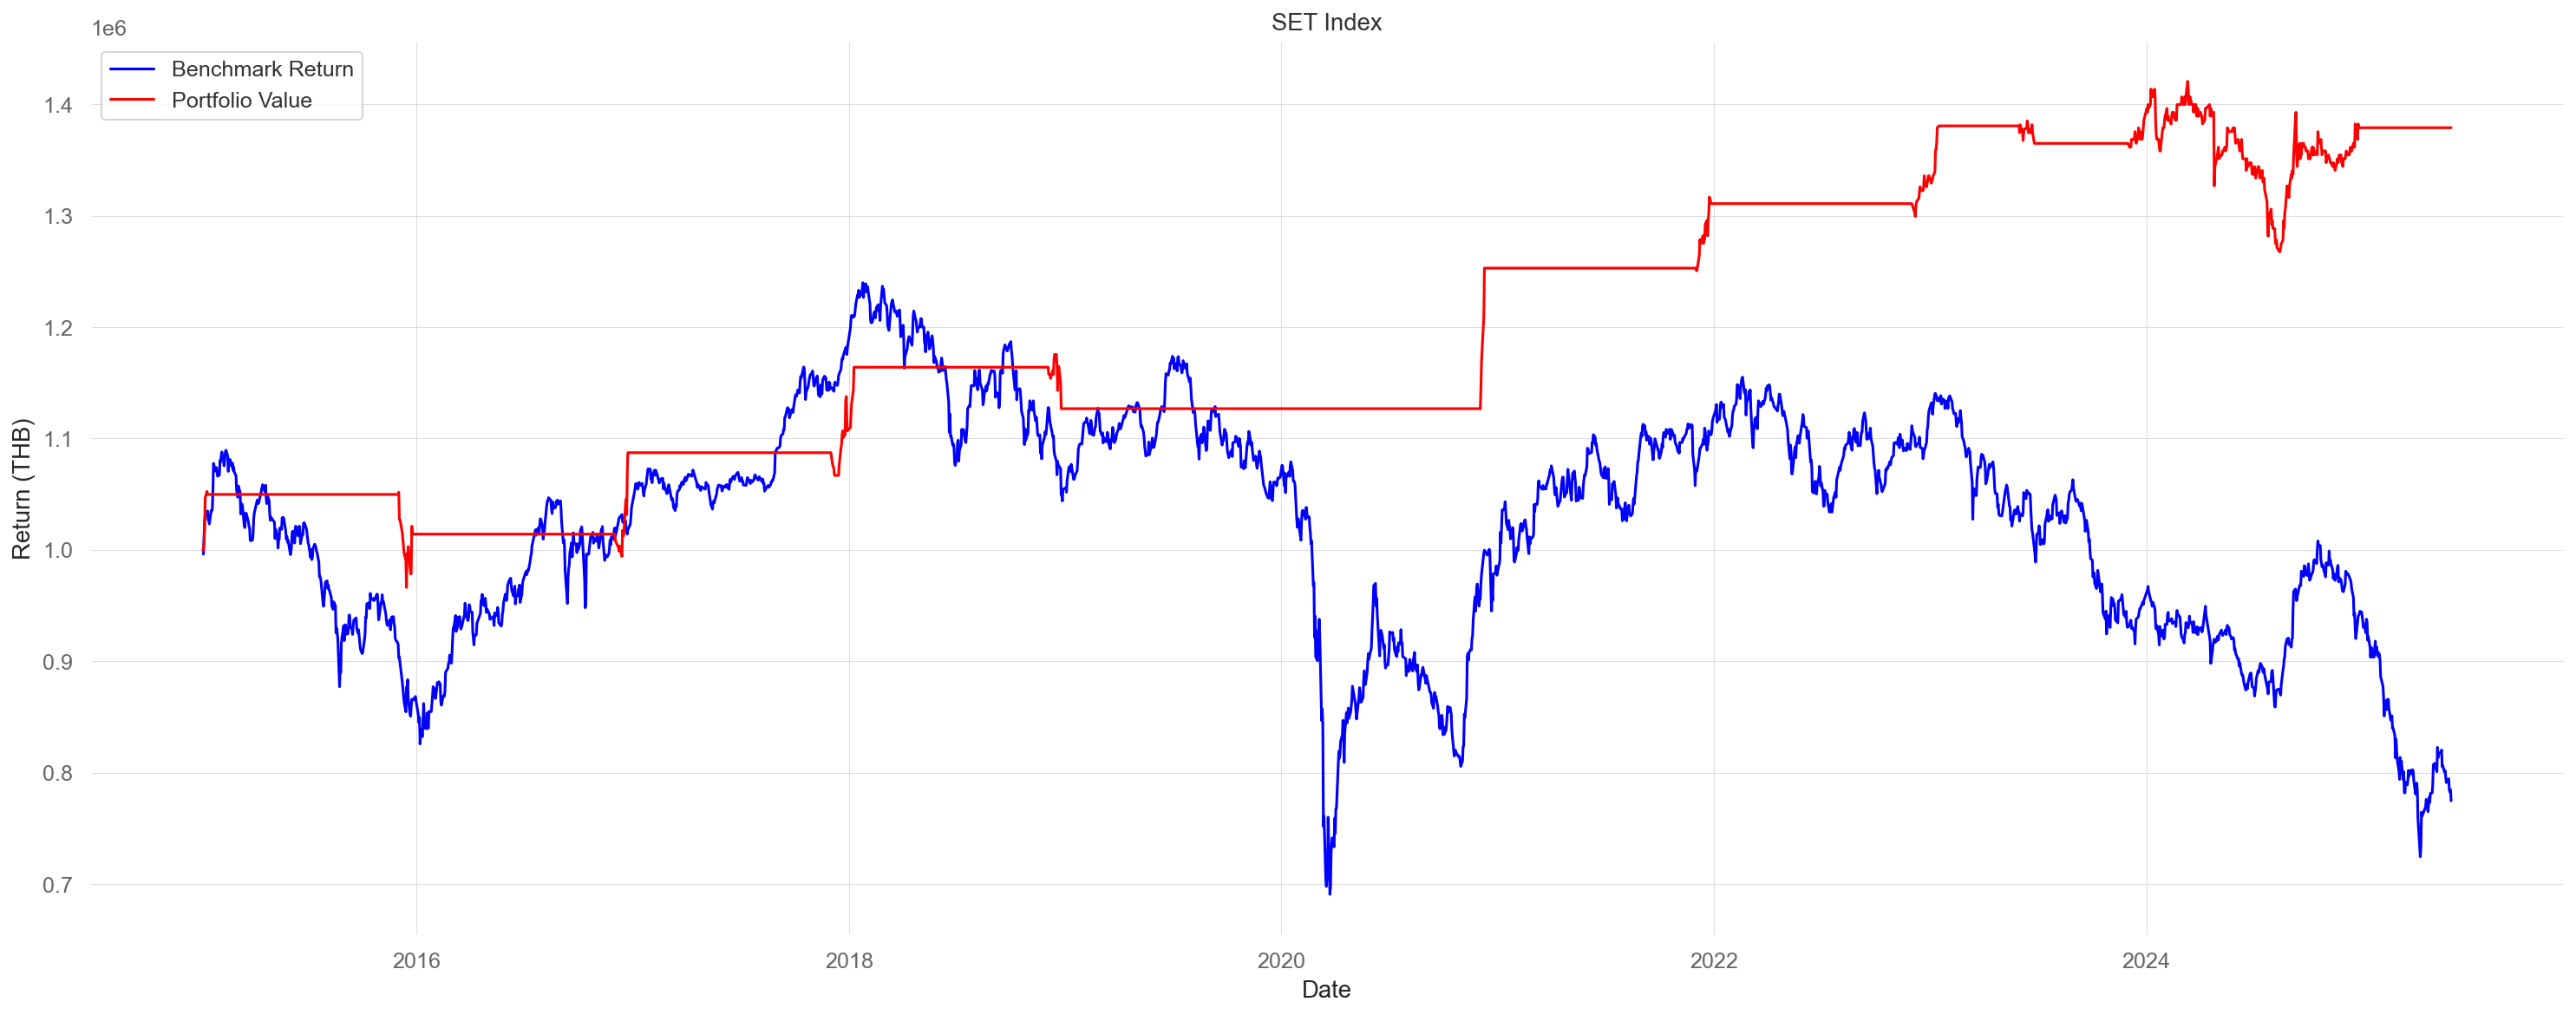

In [146]:
fig, ax = plt.subplots(figsize=(20, 8),dpi = 150)

ax.plot(set_index['Date'], set_index['Money'], label='Benchmark Return', color='blue')
ax.plot(processed_port_value['Date'], processed_port_value['Value'], label='Portfolio Value', color='red')


ax.set_title('SET Index')
ax.set_xlabel('Date')
ax.set_ylabel('Return (THB)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()